# Came third in this hackathon (username: Bal1u):
- https://dphi.tech/practice/challenge/28#leaderboard

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import pairplot 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
le = LabelEncoder()

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/concrete_data/training_set_label.csv")

In [3]:
df_train.columns = ["Cement", "Blast_Furnace", "Fly_Ash", "Water", "Superplast", "Course_Agg", "Fine_Agg", "Age", "CCS"]
df_train

,Cement,Blast_Furnace,Fly_Ash,Water,Superplast,Course_Agg,Fine_Agg,Age,CCS
0,298.20,0.0,107.00,209.70,11.10,879.60,744.20,28,31.875165
1,397.00,0.0,0.00,186.00,0.00,1040.00,734.00,28,36.935229
2,251.37,0.0,118.27,188.45,6.35,1028.40,757.73,56,36.638755
3,304.00,140.0,0.00,214.00,6.00,895.00,722.00,28,33.418902
4,297.00,0.0,0.00,186.00,0.00,1040.00,734.00,7,30.957472
...,...,...,...,...,...,...,...,...,...
767,252.50,0.0,0.00,185.70,0.00,1111.60,784.30,7,11.483912
768,249.10,0.0,98.75,158.11,12.80,987.76,889.01,56,42.030457
769,255.00,0.0,0.00,192.00,0.00,889.80,945.00,3,8.204075
770,190.68,0.0,125.40,162.14,7.77,1090.00,804.01,100,40.568768


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cement         772 non-null    float64
 1   Blast_Furnace  772 non-null    float64
 2   Fly_Ash        772 non-null    float64
 3   Water          772 non-null    float64
 4   Superplast     772 non-null    float64
 5   Course_Agg     772 non-null    float64
 6   Fine_Agg       772 non-null    float64
 7   Age            772 non-null    int64  
 8   CCS            772 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 54.4 KB


In [5]:
df_train.isnull().sum()

Cement           0
Blast_Furnace    0
Fly_Ash          0
Water            0
Superplast       0
Course_Agg       0
Fine_Agg         0
Age              0
CCS              0
dtype: int64

In [6]:
df_train.describe()

,Cement,Blast_Furnace,Fly_Ash,Water,Superplast,Course_Agg,Fine_Agg,Age,CCS
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,280.722565,76.496140,52.701347,182.361593,6.000848,971.558782,771.618355,44.993523,35.724196
std,104.711803,87.477423,63.596763,20.913641,5.844002,77.078828,79.785875,60.442735,16.797389
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.340000,0.000000,0.000000,166.677500,0.000000,932.000000,724.300000,12.250000,23.677591
50%,275.000000,24.000000,0.000000,185.700000,6.050000,968.000000,777.800000,28.000000,33.870853
75%,350.000000,144.775000,118.187500,193.000000,10.025000,1028.100000,821.000000,56.000000,46.232813
max,540.000000,359.400000,200.100000,237.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [7]:
df_train["Total_Loss"] = df_train.Fly_Ash+df_train.Water+df_train.Course_Agg+df_train.Fine_Agg
df_train["Total_gain"] = df_train.Cement+ df_train.Blast_Furnace+df_train.Superplast+ df_train.Age
df_train["Net"] = df_train["Total_Loss"] - df_train["Total_gain"]
df_train["Total_agg"] = df_train.Course_Agg+df_train.Fine_Agg
df_train["Loss"] = df_train.Fly_Ash+df_train.Water
df_train["gain"] = (df_train.Cement+ df_train.Blast_Furnace+df_train.Superplast)
df_train["sml_net"] = df_train.gain - df_train.Loss
df_train["pct_net"] = df_train["gain"]/df_train["Loss"]
df_train["W/C"] = df_train["Water"]/df_train["Cement"]

In [8]:
df_train.corr()

,Cement,Blast_Furnace,Fly_Ash,Water,Superplast,Course_Agg,Fine_Agg,Age,CCS,Total_Loss,Total_gain,Net,Total_agg,Loss,gain,sml_net,pct_net,W/C
Cement,1.000000,-0.293098,-0.388935,-0.057099,0.067509,-0.123236,-0.215750,0.088178,0.474385,-0.471607,0.637366,-0.591883,-0.266975,-0.422678,0.686599,0.658302,0.623842,-0.881054
Blast_Furnace,-0.293098,1.000000,-0.321431,0.108674,0.030881,-0.263619,-0.292780,-0.032658,0.140549,-0.554086,0.413351,-0.503181,-0.436542,-0.296180,0.492199,0.469300,0.451440,0.370397
Fly_Ash,-0.388935,-0.321431,1.000000,-0.270187,0.400208,-0.005894,0.082229,-0.143224,-0.091827,0.573833,-0.564949,0.599532,0.061030,0.944595,-0.574610,-0.777322,-0.732058,0.241460
Water,-0.057099,0.108674,-0.270187,1.000000,-0.664826,-0.176659,-0.456134,0.263403,-0.292147,-0.414603,0.116980,-0.266326,-0.499811,0.060814,-0.003090,-0.025535,-0.152447,0.314554
Superplast,0.067509,0.030881,0.400208,-0.664826,1.000000,-0.250230,0.224024,-0.169331,0.373130,0.090793,0.040435,0.020478,-0.014127,0.188247,0.134909,0.025398,0.143216,-0.204124
Course_Agg,-0.123236,-0.263619,-0.005894,-0.176659,-0.250230,1.000000,-0.186632,0.010220,-0.170232,0.520673,-0.276677,0.408812,0.621527,-0.066337,-0.323375,-0.208353,-0.188255,-0.010069
Fine_Agg,-0.215750,-0.292780,0.082229,-0.456134,0.224024,-0.186632,1.000000,-0.175534,-0.161386,0.547297,-0.432222,0.510730,0.653631,-0.070257,-0.405168,-0.265980,-0.175446,0.053099
Age,0.088178,-0.032658,-0.143224,0.263403,-0.169331,0.010220,-0.175534,1.000000,0.351344,-0.150662,0.494803,-0.355921,-0.132098,-0.058682,0.046543,0.056131,0.027020,-0.026392
CCS,0.474385,0.140549,-0.091827,-0.292147,0.373130,-0.170232,-0.161386,0.351344,1.000000,-0.339962,0.641792,-0.531136,-0.259828,-0.194796,0.554253,0.475313,0.483821,-0.485746
Total_Loss,-0.471607,-0.554086,0.573833,-0.414603,0.090793,0.520673,0.547297,-0.150662,-0.339962,1.000000,-0.799961,0.939043,0.837516,0.453550,-0.840871,-0.781655,-0.701053,0.227508


In [9]:
# sns.pairplot(df_train)

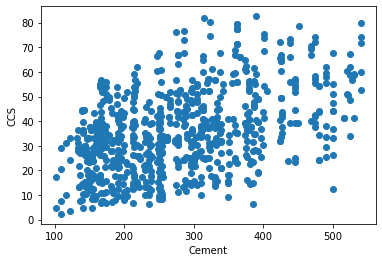

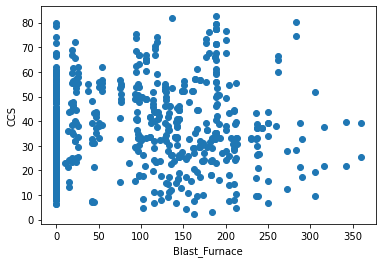

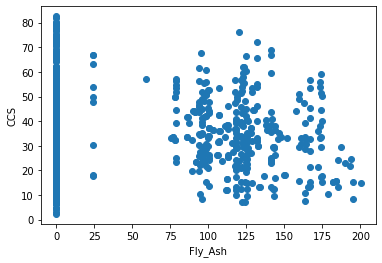

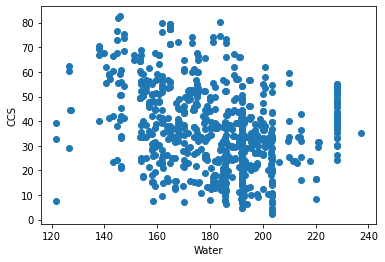

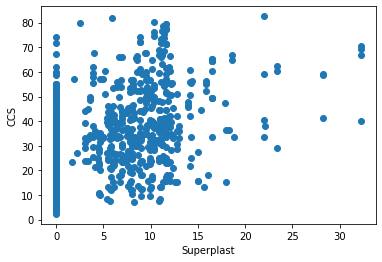

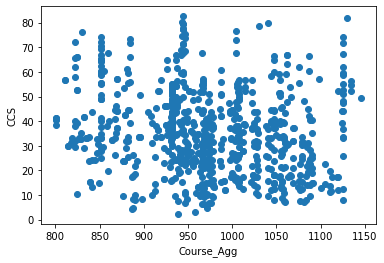

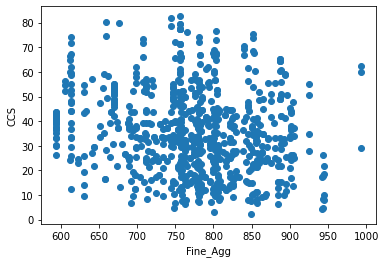

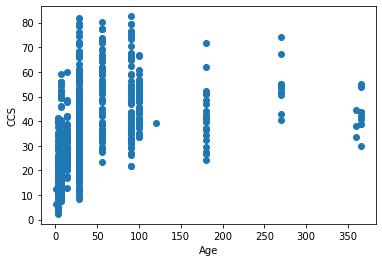

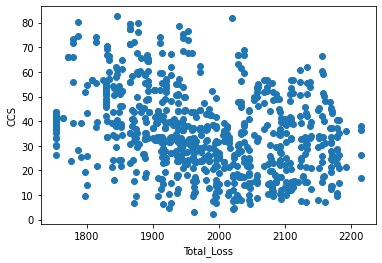

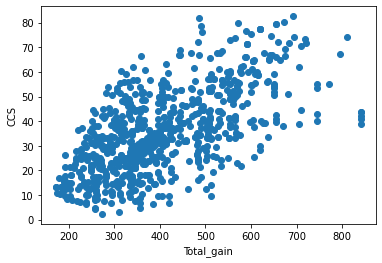

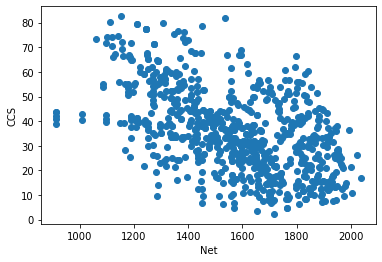

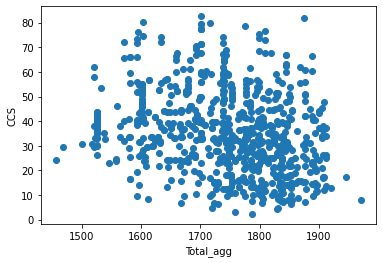

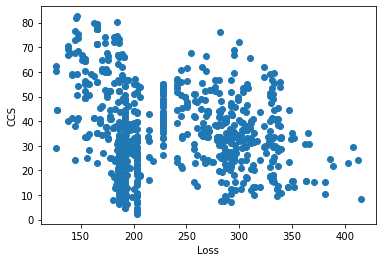

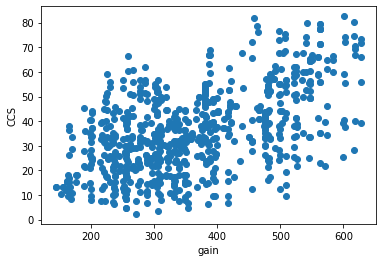

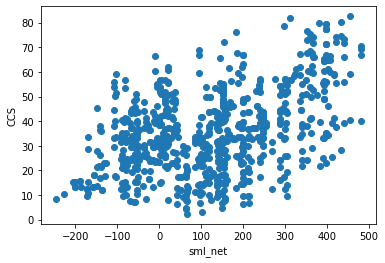

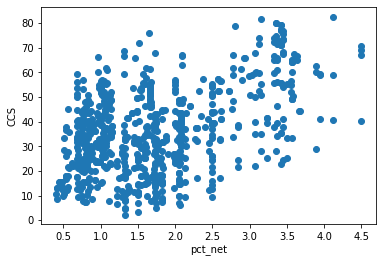

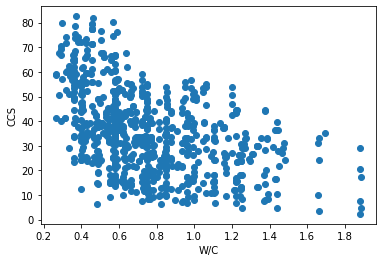

In [10]:
for column in df_train.drop(columns=["CCS"]).columns:
    plt.scatter(x=df_train[column], y=df_train["CCS"])
    plt.ylabel("CCS")
    plt.xlabel(column)
    plt.show()

In [11]:
df_train1 = df_train.copy()

In [12]:
def catorize(column, encoded = np.array(df_train[column].quantile([0,0.25,0.5,0.75, 1]))): 
    i = 0
    for minlim, maxlim in zip(encoded[:-1], encoded[1:]):
        filt = (df_train[column] >= minlim) & (df_train[column] <= maxlim)
        df_train.loc[filt, column] = i
        i+=1
def encoder(cat, cont):
    grp = df_train.groupby([cat])
    lst = grp[cont].median().sort_values().index
    feature_map = {lst[i]: i for i in range(len(lst))}
    df_train[cat] = df_train[cat].map(feature_map)
    print(lst)

Float64Index([2.0, 3.0, 1.0, 0.0], dtype='float64', name='Total_Loss')
0.37476257278738134


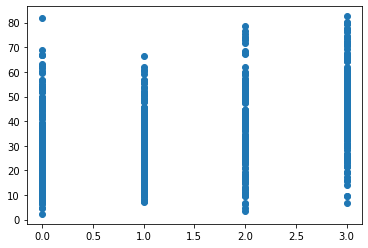

In [13]:
catorize("Total_Loss", np.array(df_train["Total_Loss"].quantile([0,0.25,0.5,0.75, 1])))
encoder("Total_Loss", "CCS")
print(df_train["Total_Loss"].corr(df_train["CCS"]))
plt.scatter(x=df_train["Total_Loss"], y=df_train["CCS"])

Float64Index([6.0, 4.0, 5.0, 3.0, 0.0, 2.0, 1.0], dtype='float64', name='Fly_Ash')
0.12896976740701258


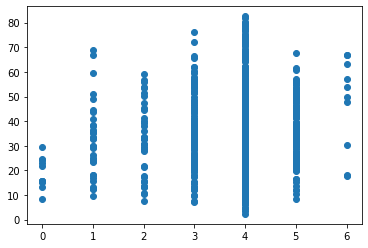

In [14]:
catorize("Fly_Ash", [0, 17, 75, 117, 140, 160, 180, 250])
encoder("Fly_Ash", "CCS")
print(df_train["Fly_Ash"].corr(df_train["CCS"]))
plt.scatter(x=df_train["Fly_Ash"], y=df_train["CCS"])

In [15]:
# catorize("Blast_Furnace", [0, 3, 35, 90, 150, 220, 280, 400])
# encoder("Fly_Ash", "CCS")
# plt.scatter(x=df_train["Blast_Furnace"], y=df_train["CCS"])
# print(df_train["Fly_Ash"].corr(df_train["CCS"]))

Float64Index([2.0, 3.0, 1.0, 0.0], dtype='float64', name='Water')
0.31818411973909955


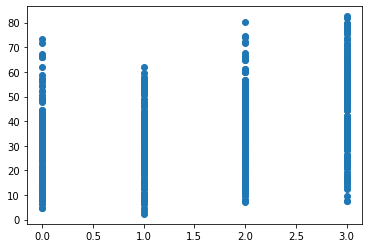

In [16]:
catorize("Water", np.array(df_train["Water"].quantile([0,0.25,0.5,0.75, 1])))
encoder("Water", "CCS")
print(df_train["Water"].corr(df_train["CCS"]))
plt.scatter(x=df_train["Water"], y=df_train["CCS"])

Float64Index([3.0, 2.0, 1.0, 0.0], dtype='float64', name='Course_Agg')
0.18346554313377914


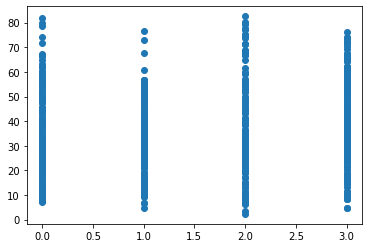

In [17]:
catorize("Course_Agg", np.array(df_train["Course_Agg"].quantile([0,0.25,0.5,0.75, 1])))
encoder("Course_Agg", "CCS")
print(df_train["Course_Agg"].corr(df_train["CCS"]))
plt.scatter(x=df_train["Course_Agg"], y=df_train["CCS"])

Float64Index([2.0, 3.0, 1.0, 0.0], dtype='float64', name='Fine_Agg')
0.15184177390874776


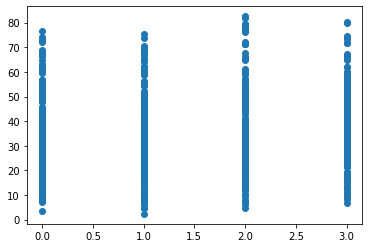

In [18]:
catorize("Fine_Agg", np.array(df_train["Fine_Agg"].quantile([0,0.25,0.5,0.75, 1])))
encoder("Fine_Agg", "CCS")
print(df_train["Fine_Agg"].corr(df_train["CCS"]))
plt.scatter(x=df_train["Fine_Agg"], y=df_train["CCS"])

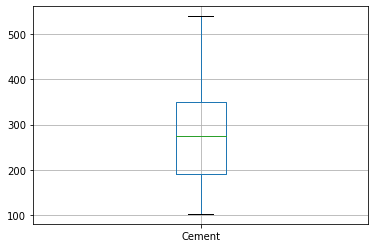

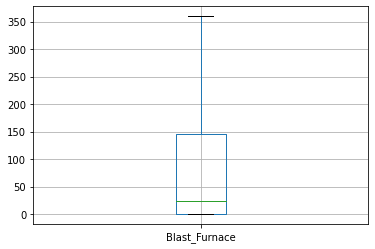

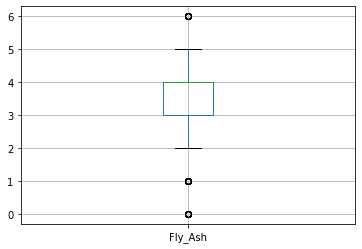

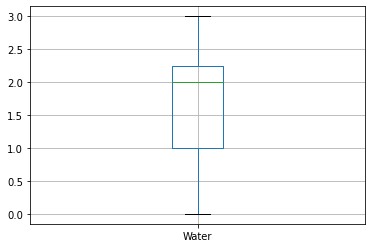

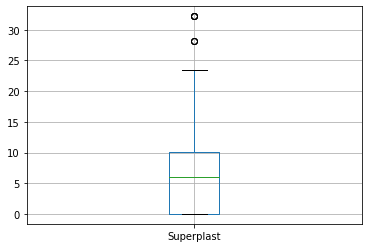

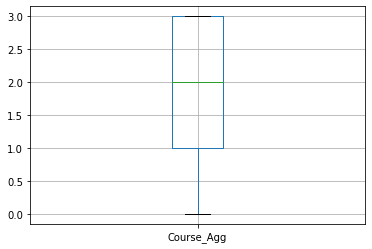

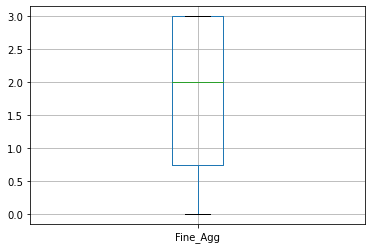

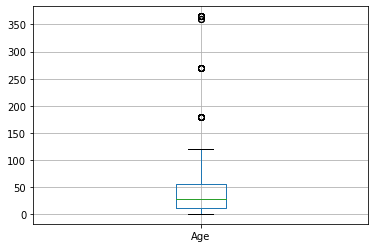

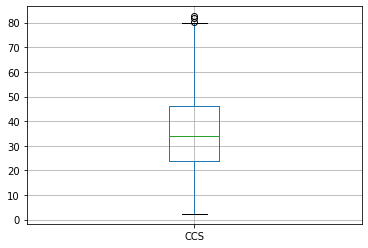

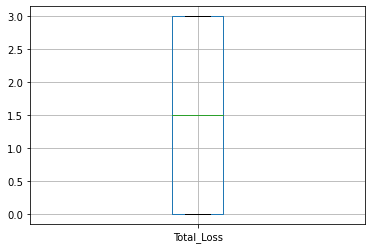

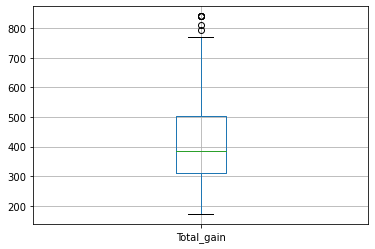

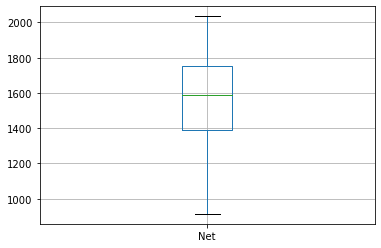

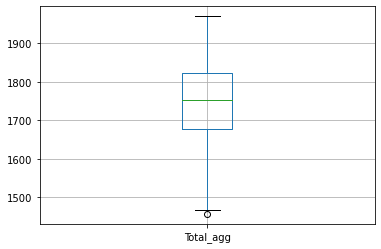

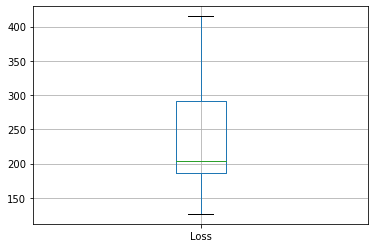

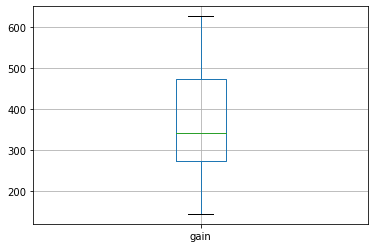

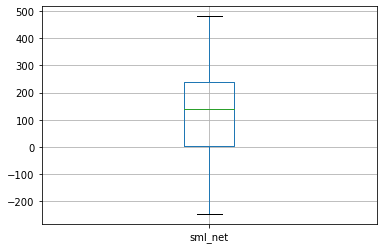

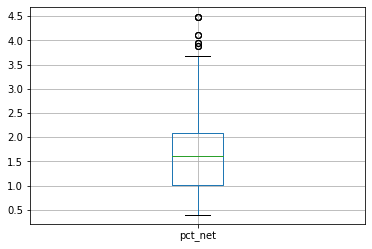

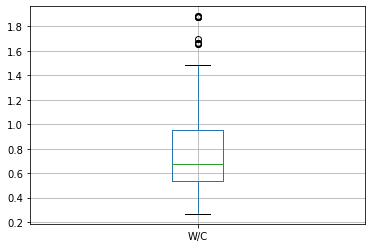

In [19]:
for column in df_train.columns:
    df_train.boxplot([column])
    plt.show()

In [20]:
df_copy = df_train1.copy()

In [21]:
for column in df_train1.drop(columns=["CCS", "pct_net", "W/C"]).columns:
     df_train1[column] = df_train1[column].map(lambda i: np.log(i) if i > 0 else 0) 

In [22]:
df_train.corr()

,Cement,Blast_Furnace,Fly_Ash,Water,Superplast,Course_Agg,Fine_Agg,Age,CCS,Total_Loss,Total_gain,Net,Total_agg,Loss,gain,sml_net,pct_net,W/C
Cement,1.000000,-0.293098,0.251544,0.028539,0.067509,0.171807,0.215140,0.088178,0.474385,0.374376,0.637366,-0.591883,-0.266975,-0.422678,0.686599,0.658302,0.623842,-0.881054
Blast_Furnace,-0.293098,1.000000,0.093015,0.007626,0.030881,0.265772,0.301984,-0.032658,0.140549,0.437676,0.413351,-0.503181,-0.436542,-0.296180,0.492199,0.469300,0.451440,0.370397
Fly_Ash,0.251544,0.093015,1.000000,-0.094221,-0.094499,0.093828,-0.029335,0.047470,0.128970,0.049780,0.276553,-0.271857,0.068685,-0.541298,0.293106,0.419293,0.335321,-0.251070
Water,0.028539,0.007626,-0.094221,1.000000,0.613561,-0.172728,-0.170120,-0.114260,0.318184,0.027204,0.002517,0.111130,0.221926,0.064139,0.062564,0.020653,0.112151,-0.220471
Superplast,0.067509,0.030881,-0.094499,0.613561,1.000000,0.157146,-0.124015,-0.169331,0.373130,0.124136,0.040435,0.020478,-0.014127,0.188247,0.134909,0.025398,0.143216,-0.204124
Course_Agg,0.171807,0.265772,0.093828,-0.172728,0.157146,1.000000,0.109966,0.087909,0.183466,0.445682,0.356812,-0.489136,-0.664784,0.006641,0.364245,0.260771,0.221182,-0.010126
Fine_Agg,0.215140,0.301984,-0.029335,-0.170120,-0.124015,0.109966,1.000000,0.105076,0.151842,0.460824,0.410176,-0.485800,-0.575925,-0.009933,0.416621,0.304985,0.240499,-0.054921
Age,0.088178,-0.032658,0.047470,-0.114260,-0.169331,0.087909,0.105076,1.000000,0.351344,0.081429,0.494803,-0.355921,-0.132098,-0.058682,0.046543,0.056131,0.027020,-0.026392
CCS,0.474385,0.140549,0.128970,0.318184,0.373130,0.183466,0.151842,0.351344,1.000000,0.374763,0.641792,-0.531136,-0.259828,-0.194796,0.554253,0.475313,0.483821,-0.485746
Total_Loss,0.374376,0.437676,0.049780,0.027204,0.124136,0.445682,0.460824,0.081429,0.374763,1.000000,0.624882,-0.711622,-0.689832,-0.213291,0.675773,0.570247,0.549960,-0.242831


In [23]:
df_train1.corr()

,Cement,Blast_Furnace,Fly_Ash,Water,Superplast,Course_Agg,Fine_Agg,Age,CCS,Total_Loss,Total_gain,Net,Total_agg,Loss,gain,sml_net,pct_net,W/C
Cement,1.000000,-0.241007,-0.338639,-0.076258,-0.030466,-0.110908,-0.197561,-0.001136,0.469458,-0.437172,0.611523,-0.554123,-0.227558,-0.422241,0.642610,0.549392,0.593202,-0.938783
Blast_Furnace,-0.241007,1.000000,-0.223848,0.038786,0.124359,-0.337598,-0.268280,0.025123,0.224104,-0.541909,0.455318,-0.486907,-0.472378,-0.227682,0.508214,0.365833,0.407738,0.292159
Fly_Ash,-0.338639,-0.223848,1.000000,-0.275963,0.588888,-0.013846,0.133087,-0.008613,-0.060275,0.571362,-0.567177,0.577455,0.081281,0.902299,-0.574144,-0.800936,-0.726407,0.189025
Water,-0.076258,0.038786,-0.275963,1.000000,-0.632648,-0.158500,-0.448407,0.131846,-0.308838,-0.393648,0.105900,-0.238353,-0.483692,0.106319,0.037311,0.118706,-0.167585,0.325608
Superplast,-0.030466,0.124359,0.588888,-0.632648,1.000000,-0.232878,0.207968,-0.010257,0.354875,0.182827,-0.099854,0.125243,-0.012184,0.315007,-0.039893,-0.338125,-0.024013,-0.129357
Course_Agg,-0.110908,-0.337598,-0.013846,-0.158500,-0.232878,1.000000,-0.174099,-0.036631,-0.174541,0.519002,-0.296023,0.396922,0.620614,-0.043828,-0.328497,-0.180301,-0.192128,-0.003548
Fine_Agg,-0.197561,-0.268280,0.133087,-0.448407,0.207968,-0.174099,1.000000,-0.137177,-0.163784,0.564662,-0.434774,0.534276,0.661557,-0.067933,-0.419829,-0.228773,-0.187259,0.057051
Age,-0.001136,0.025123,-0.008613,0.131846,-0.010257,-0.036631,-0.137177,1.000000,0.569972,-0.099050,0.324983,-0.262371,-0.134495,0.047996,0.004542,-0.011380,-0.021527,0.029342
CCS,0.469458,0.224104,-0.060275,-0.308838,0.354875,-0.174541,-0.163784,0.569972,1.000000,-0.343006,0.640229,-0.533392,-0.255849,-0.213175,0.530518,0.298187,0.483821,-0.485746
Total_Loss,-0.437172,-0.541909,0.571362,-0.393648,0.182827,0.519002,0.564662,-0.099050,-0.343006,1.000000,-0.818679,0.927831,0.836726,0.452333,-0.850937,-0.724503,-0.698234,0.229528


In [24]:
df_train2 = df_train1[["Cement"]]
df_train2.loc[:,"Blast_Furnace"] = df_train1["Blast_Furnace"]
df_train2.loc[:,"Fly_Ash"] = df_train["Fly_Ash"]
df_train2.loc[:,"Water"] = df_train["Water"]
df_train2.loc[:,"Superplast"] = df_train1["Superplast"]
df_train2.loc[:,"Course_Agg"] = df_train["Course_Agg"]
df_train2.loc[:,"Fine_Agg"] = df_train1["Fine_Agg"]
df_train2.loc[:,"Age"] = df_train1["Age"]
df_train2.loc[:, "Total_Loss"] = df_train["Total_Loss"]
df_train2.loc[:, "Total_gain"] = df_train1["Total_gain"]
df_train2.loc[:, "Net"] = df_train1["Net"]
df_train2.loc[:, "Total_agg"] = df_train1["Total_agg"]
df_train2.loc[:,"CCS"] = df_train["CCS"]

C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [25]:
df_train2

,Cement,Blast_Furnace,Fly_Ash,Water,Superplast,Course_Agg,Fine_Agg,Age,Total_Loss,Total_gain,Net,Total_agg,CCS
0,5.697764,0.000000,5,1,2.406945,3,6.612310,3.332205,2,5.820973,7.379757,7.392524,31.875165
1,5.983936,0.000000,4,0,0.000000,0,6.598509,3.332205,2,6.052089,7.336286,7.480992,36.935229
2,5.526926,0.000000,3,0,1.848455,0,6.630327,4.025352,1,5.748501,7.483880,7.487807,36.638755
3,5.717028,4.941642,4,1,1.791759,3,6.582025,3.332205,3,6.169611,7.210080,7.388328,33.418902
4,5.693732,0.000000,4,0,0.000000,0,6.598509,1.945910,2,5.717028,7.412160,7.480992,30.957472
...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,5.531411,0.000000,4,2,0.000000,0,6.664792,1.945910,1,5.558757,7.507745,7.547449,11.483912
768,5.517854,0.000000,5,3,2.549445,1,6.790108,4.025352,1,5.761737,7.504243,7.537307,42.030457
769,5.541264,0.000000,4,0,0.000000,3,6.851185,1.098612,0,5.552960,7.478057,7.514691,8.204075
770,5.250597,0.000000,3,3,2.050270,0,6.689612,4.605170,1,5.698602,7.540675,7.546452,40.568768


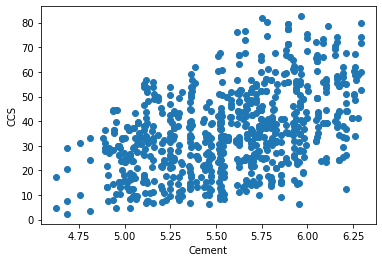

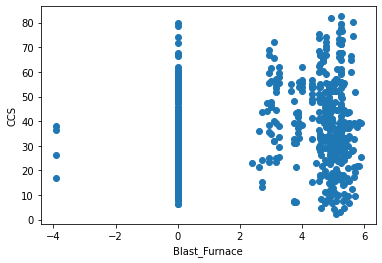

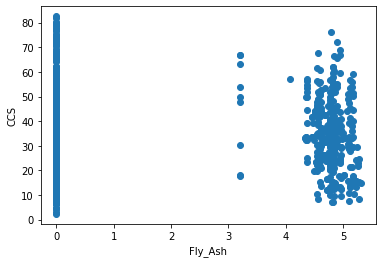

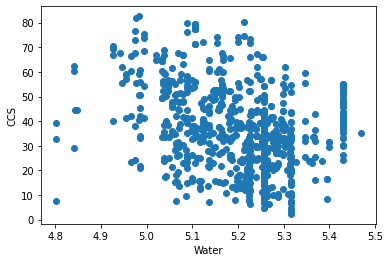

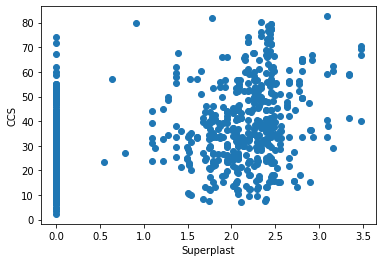

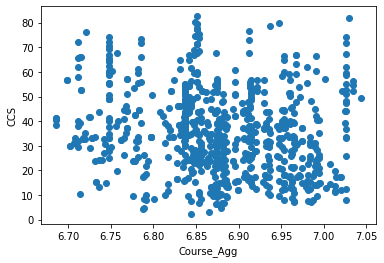

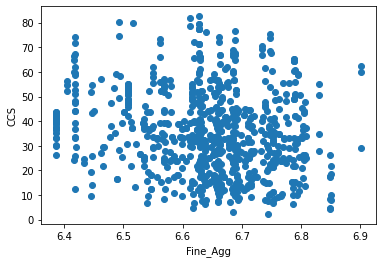

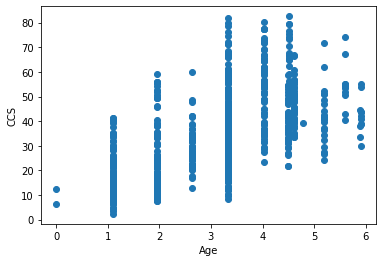

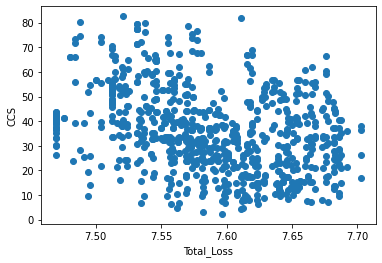

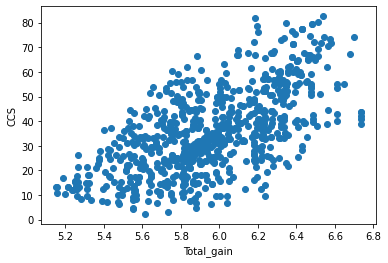

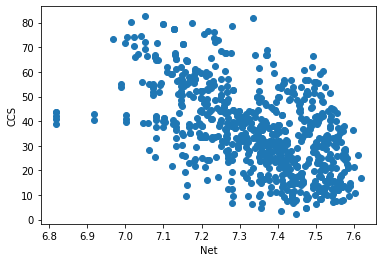

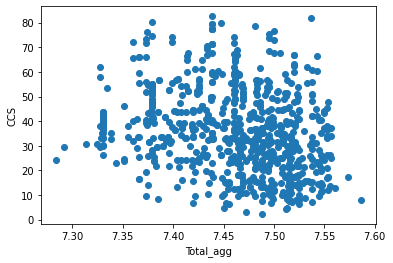

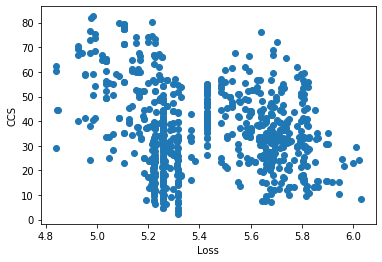

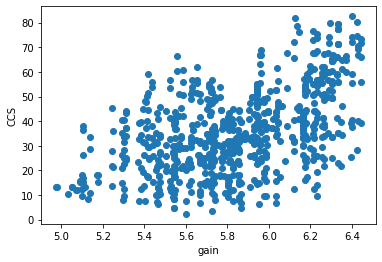

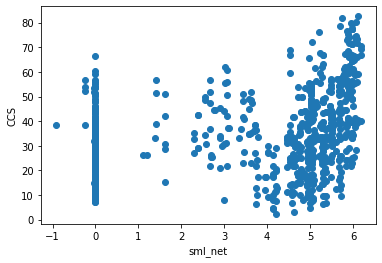

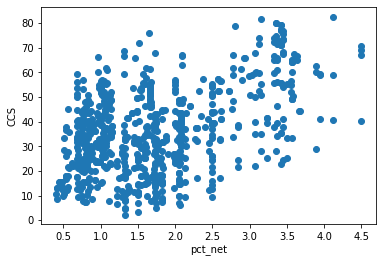

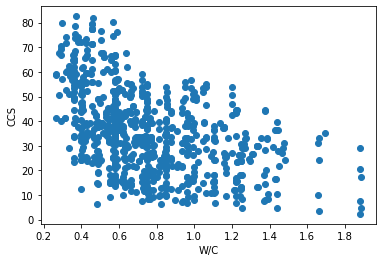

In [26]:
for column in df_train1.drop(columns=["CCS"]).columns:
    plt.scatter(x=df_train1[column], y=df_train1["CCS"])
    plt.ylabel("CCS")
    plt.xlabel(column)
    plt.show()

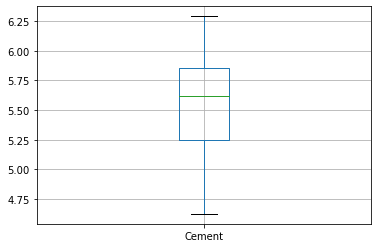

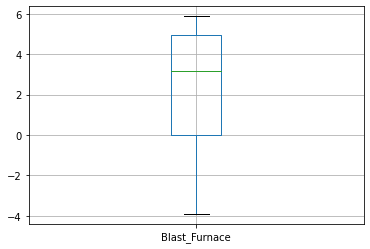

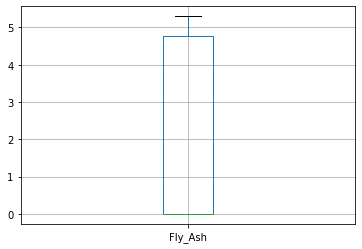

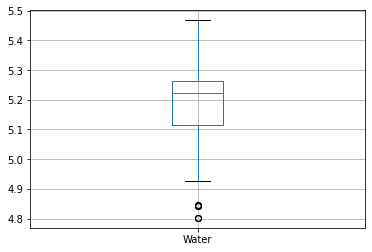

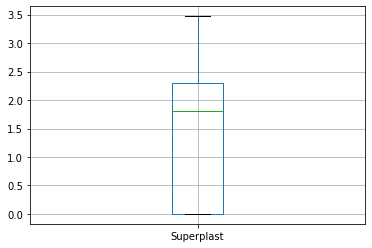

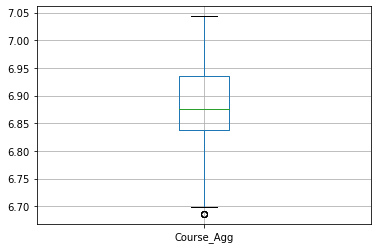

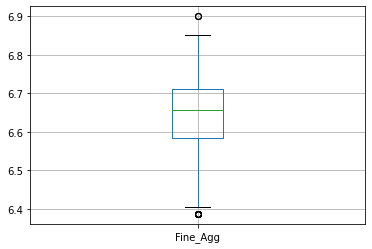

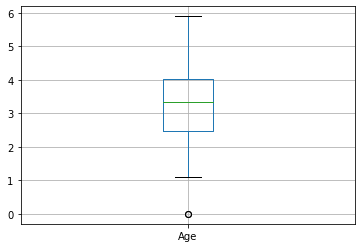

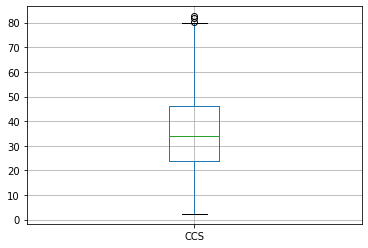

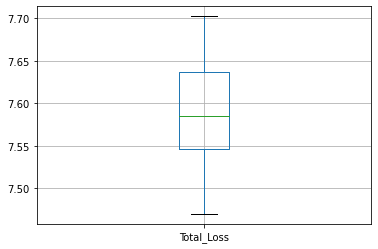

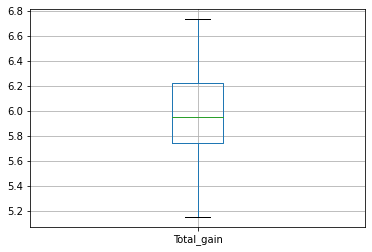

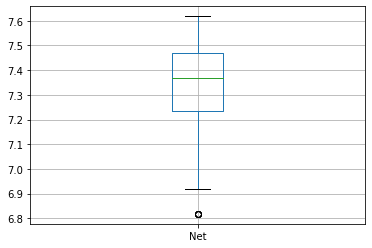

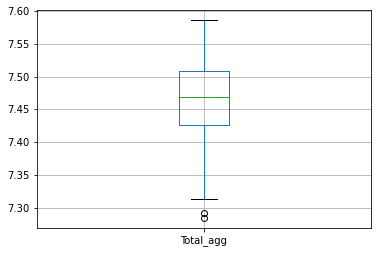

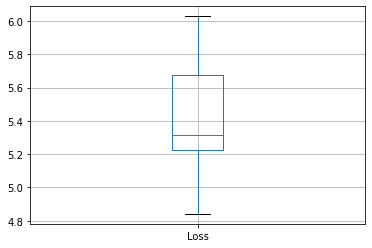

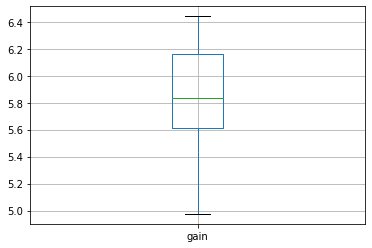

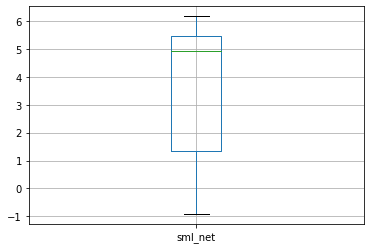

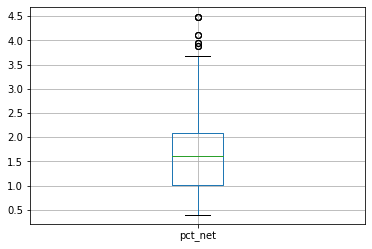

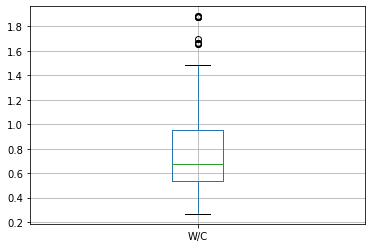

In [27]:
for column in df_train1.columns:
    df_train1.boxplot([column])
    plt.show()

# Model Making

In [28]:
X = df_train1.drop(columns=["CCS"])
y = df_train.CCS

In [29]:
features = X.columns

In [30]:
# pca = PCA()
# scaler = StandardScaler()
# X = pca.fit_transform(scaler.fit_transform(X))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [32]:
def bagging(model):
    bgr = BaggingRegressor(base_estimator=model, n_estimators=100, verbose=1)
    print(bgr.fit(X_train, y_train).score(X_test, y_test)*100)
    print(f"RMSE_train: {np.sqrt(mean_squared_error(y_train, abs(bgr.predict(X_train))))}")
    print(f"RMSE_test: {np.sqrt(mean_squared_error(y_test, abs(bgr.predict(X_test))))}")
def ada_boost(model):
    ada = AdaBoostRegressor(base_estimator=model,n_estimators=100)
    print(ada.fit(X_train, y_train).score(X_test, y_test)*100)
    print(f"RMSE_train: {np.sqrt(mean_squared_error(y_train, abs(ada.predict(X_train))))}")
    print(f"RMSE_test: {np.sqrt(mean_squared_error(y_test, abs(ada.predict(X_test))))}")

In [33]:
lin_reg = LinearRegression(normalize=True)
print(lin_reg.fit(X_train, y_train).score(X_test, y_test)*100)
print(f"RMSE_train: {np.sqrt(mean_squared_error(y_train, abs(lin_reg.predict(X_train))))}")
print(f"RMSE_test: {np.sqrt(mean_squared_error(y_test, abs(lin_reg.predict(X_test))))}")

86.28092700484898
RMSE_train: 6.638788879291602
RMSE_test: 6.133894300912719


In [34]:
ada_boost(lin_reg)

84.15517967758295
RMSE_train: 6.853285827952215
RMSE_test: 6.584292742233445


In [35]:
grad = GradientBoostingRegressor(n_estimators=1000, max_leaf_nodes=14, max_depth=10)
print(grad.fit(X_train, y_train).score(X_test, y_test)*100)
print(f"RMSE_train: {np.sqrt(mean_squared_error(y_train, abs(grad.predict(X_train))))}")
print(f"RMSE_test: {np.sqrt(mean_squared_error(y_test, abs(grad.predict(X_test))))}")

94.51713338257105
RMSE_train: 0.9443502383228857
RMSE_test: 3.9254873870420655


In [36]:
ada_boost(grad)

94.77593946158144
RMSE_train: 1.3934278733174545
RMSE_test: 3.8317207106149374


In [37]:
xgb = XGBRegressor(max_depth = 4, num_parallel_tree=7, n_estimators=1000, 
                   objective ='reg:linear', colsample_bytree = 0.4, 
                   learning_rate = 0.2, alpha = 0.2)
print(xgb.fit(X_train, y_train).score(X_test, y_test)*100)
print(f"RMSE_train: {np.sqrt(mean_squared_error(y_train, abs(xgb.predict(X_train))))}")
print(f"RMSE_test: {np.sqrt(mean_squared_error(y_test, abs(xgb.predict(X_test))))}")

[23:44:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[23:44:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
94.6671631647364
RMSE_train: 0.9493293202055494
RMSE_test: 3.8714075607915386


In [38]:
# ada_boost(xgb)

In [39]:
rf = RandomForestRegressor(n_estimators=1000, oob_score=True, max_depth=15)
print("Accuracy:", rf.fit(X_train, y_train).oob_score_*100)
print(rf.score(X_test, y_test)*100)
print(rf.score(X_train, y_train)*100)
print(f"RMSE_train: {np.sqrt(mean_squared_error(y_train, abs(rf.predict(X_train))))}")
print(f"RMSE_test: {np.sqrt(mean_squared_error(y_test, abs(rf.predict(X_test))))}")

Accuracy: 89.03258436447315
92.25929129584287
98.30927743844028
RMSE_train: 2.1834314169333546
RMSE_test: 4.66423161237809


In [40]:
# ada_boost(rf)

In [41]:
tree_features = []
for feature, imp in zip(features, rf.feature_importances_):
    if imp*100 >= 9:
        print(feature, imp*100, '%')
        tree_features.append(feature)

Age 30.78513136520374 %
Total_gain 24.618494711697064 %


Accuracy: 60.667895202824006


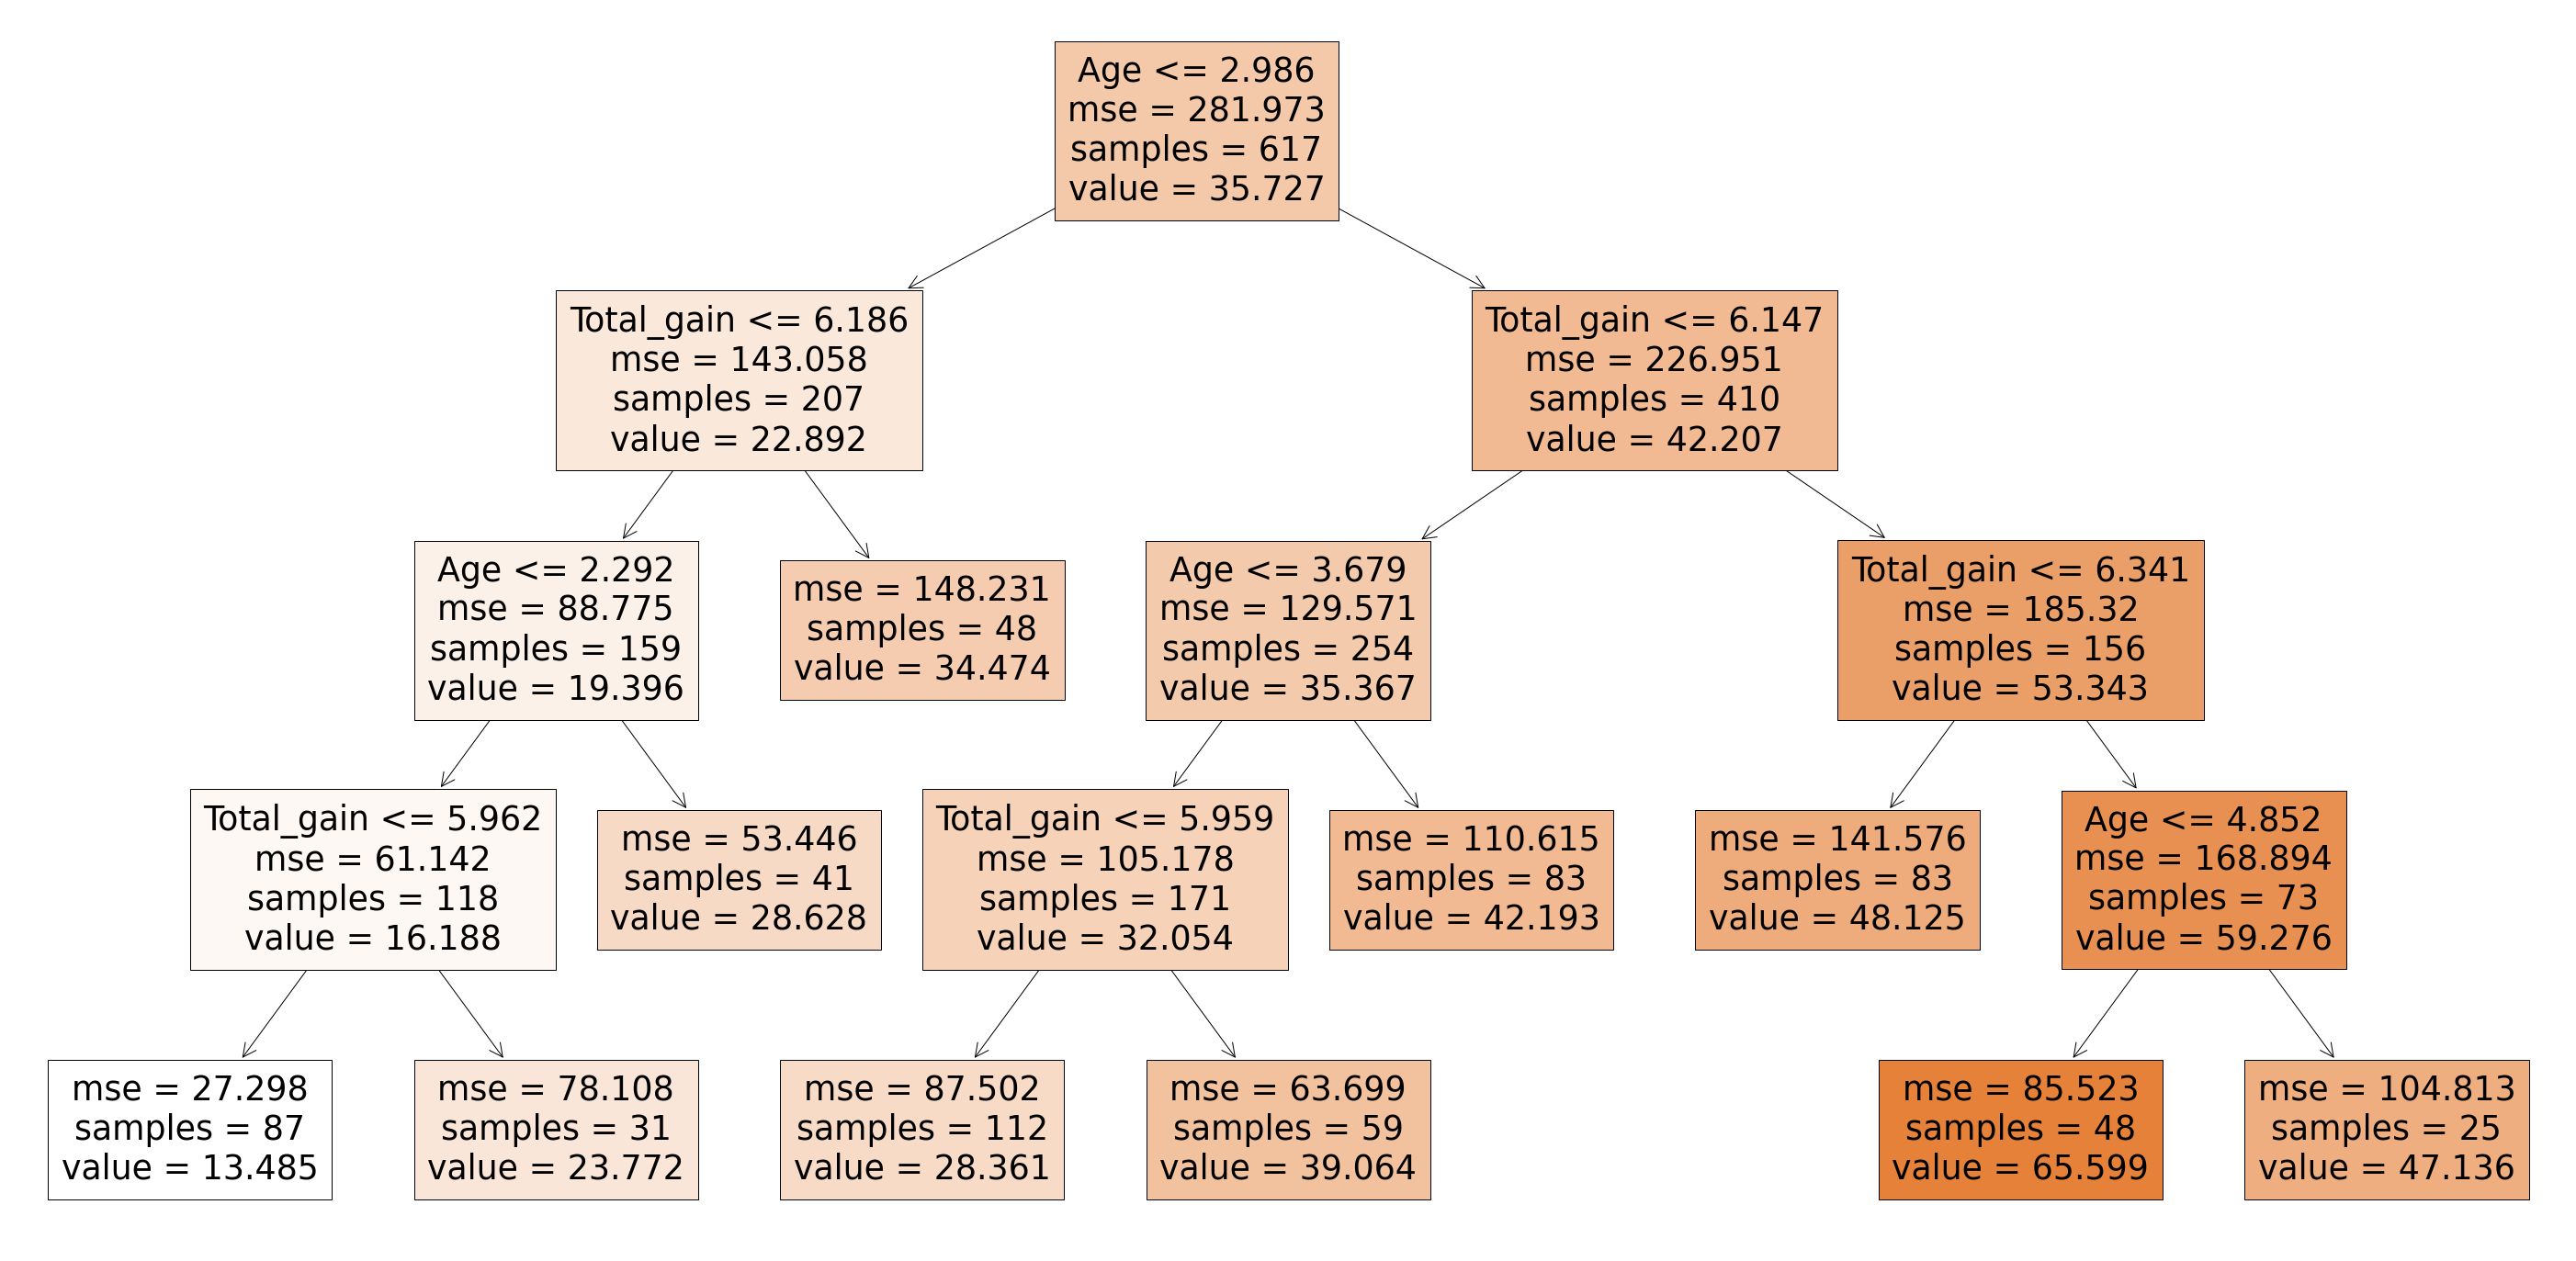

In [42]:
# tree_features = X.columns
X_train1 = X_train[tree_features]
X_test1 = X_test[tree_features]
dec_tree = DecisionTreeRegressor(max_leaf_nodes = 10)
dec_tree.fit(X_train1, y_train)
print("Accuracy:", dec_tree.score(X_test1, y_test)*100)
fig = plt.figure(figsize = (50, 25))
_=tree.plot_tree(dec_tree, feature_names = tree_features, filled=True)

In [43]:
y_pred = abs(dec_tree.predict(X_test1))
print(f"RMSE_train: {np.sqrt(mean_squared_error(y_train, abs(dec_tree.predict(X_train1))))}")
print(f"RMSE_test: {np.sqrt(mean_squared_error(y_test, y_pred))}")

RMSE_train: 9.468737907727212
RMSE_test: 10.513887837890813


In [44]:
ada_boost(dec_tree)

85.21964626870518
RMSE_train: 5.822401828345537
RMSE_test: 6.445137096707494


# =============================================

In [45]:
df_test= pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/concrete_data/testing_set_label.csv')
df_test.columns = ["Cement", "Blast_Furnace", "Fly_Ash", "Water", "Superplast", "Course_Agg", "Fine_Agg", "Age"]
df_test.head()

,Cement,Blast_Furnace,Fly_Ash,Water,Superplast,Course_Agg,Fine_Agg,Age
0,167.00,187.00,195.00,185.00,7.00,898.0,636.00,28
1,148.50,139.40,108.60,192.70,6.10,892.4,780.00,28
2,154.80,0.00,142.80,193.30,9.10,877.2,867.70,28
3,236.00,0.00,0.00,193.00,0.00,968.0,885.00,365
4,168.88,42.22,124.25,158.33,10.83,1080.8,796.15,14


In [46]:
breaks

NameError: name 'breaks' is not defined

In [ ]:
df_test["Total_Loss"] = df_test.Fly_Ash+df_test.Water+df_test.Course_Agg+df_test.Fine_Agg
df_test["Total_gain"] = df_test.Cement+ df_test.Blast_Furnace+df_test.Superplast+ df_test.Age
df_test["Net"] = df_test["Total_Loss"] - df_test["Total_gain"]
df_test["Total_agg"] = df_test.Course_Agg+df_test.Fine_Agg
df_test["Loss"] = df_test.Fly_Ash+df_test.Water
df_test["gain"] = (df_test.Cement+ df_test.Blast_Furnace+df_test.Superplast)
df_test["sml_net"] = df_test.gain - df_test.Loss
df_test["pct_net"] = df_test["gain"]/df_test["Loss"]
df_test["W/C"] = df_test["Water"]/df_test["Cement"]

In [ ]:
# def catorize(column, encoded = np.array(df_copy[column].quantile([0,0.25,0.5,0.75, 1]))): 
#     i = 0
#     for minlim, maxlim in zip(encoded[:-1], encoded[1:]):
#         filt = (df_test[column] >= minlim) & (df_test[column] <= maxlim)
#         df_test.loc[filt, column] = i
#         i+=1

In [ ]:
log_feat = X.drop(columns=["pct_net", "W/C"]).columns
for column in log_feat:
     df_test[column] = df_test[column].map(lambda i: np.log(i) if i > 0 else 0) 

In [ ]:
df_test

In [ ]:
df_train1

In [ ]:
def bagging(model, x_test, y_test, ):
    bgr = BaggingRegressor(base_estimator=model, n_estimators=100, verbose=1)
    print(bgr.fit(X_test, y_test).score(X_train, y_train)*100)
    
def ada_boost(model):
    ada = AdaBoostRegressor(base_estimator=model,n_estimators=100)
    print(ada.fit(X_test, y_test).score(X_train, y_train)*100)

In [ ]:
grad = GradientBoostingRegressor(n_estimators=1000, max_leaf_nodes=14, max_depth=10)
grad.fit(X, y)
y_pred = abs(grad.predict(df_test))

In [ ]:
xgb = XGBRegressor(max_depth = 4, num_parallel_tree=7, n_estimators=1000, 
                   objective ='reg:linear', colsample_bytree = 0.4, 
                   learning_rate = 0.2, alpha = 0.2)
xgb.fit(X, y)
y_pred = abs(xgb.predict(df_test))

In [ ]:
ada = AdaBoostRegressor(base_estimator=grad,n_estimators=100)
ada.fit(X, y)
y_pred = abs(ada.predict(df_test))

In [ ]:
ans = pd.DataFrame([y_pred])
ans = ans.melt()[["value"]]
ans.to_csv("Submission.csv", index=False)